# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
getwd()

[1] "/Users/tim/Documents/GradSchool/Coursework/S22/85-732/nolan_DSPN_S22/Homeworks/HW8"

In [2]:
hcpdata <- read.csv(file = '../hcp_data/unrestricted_trimmed_1_7_2020_10_50_44.csv')

head(hcpdata)

,Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
2,100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
3,100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
4,100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
5,100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
6,101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80


In [3]:
#Tidy hcpdata into d1
library(tidyverse)

myvars <- c("Subject", "Gender", "Flanker_Unadj", "FS_IntraCranial_Vol", "FS_Tot_WM_Vol", "FS_Total_GM_Vol")
d1 <- na.omit(hcpdata[myvars])

#Convert Gender Strings to Doubles
d1$Gender <- gsub('M','1',d1$Gender)
d1$Gender <- gsub('F','0',d1$Gender)
d1$Gender <- as.numeric(d1$Gender)

head(d1)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>
2,100206,1,130.42,1864518,543134,807245
3,100307,0,112.56,1512540,407292,664124
4,100408,1,121.18,1684117,500417,726206
5,100610,1,126.53,1816044,512946,762308
6,101006,0,101.85,1437868,429449,579632
7,101107,1,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

`geom_smooth()` using formula 'y ~ x'



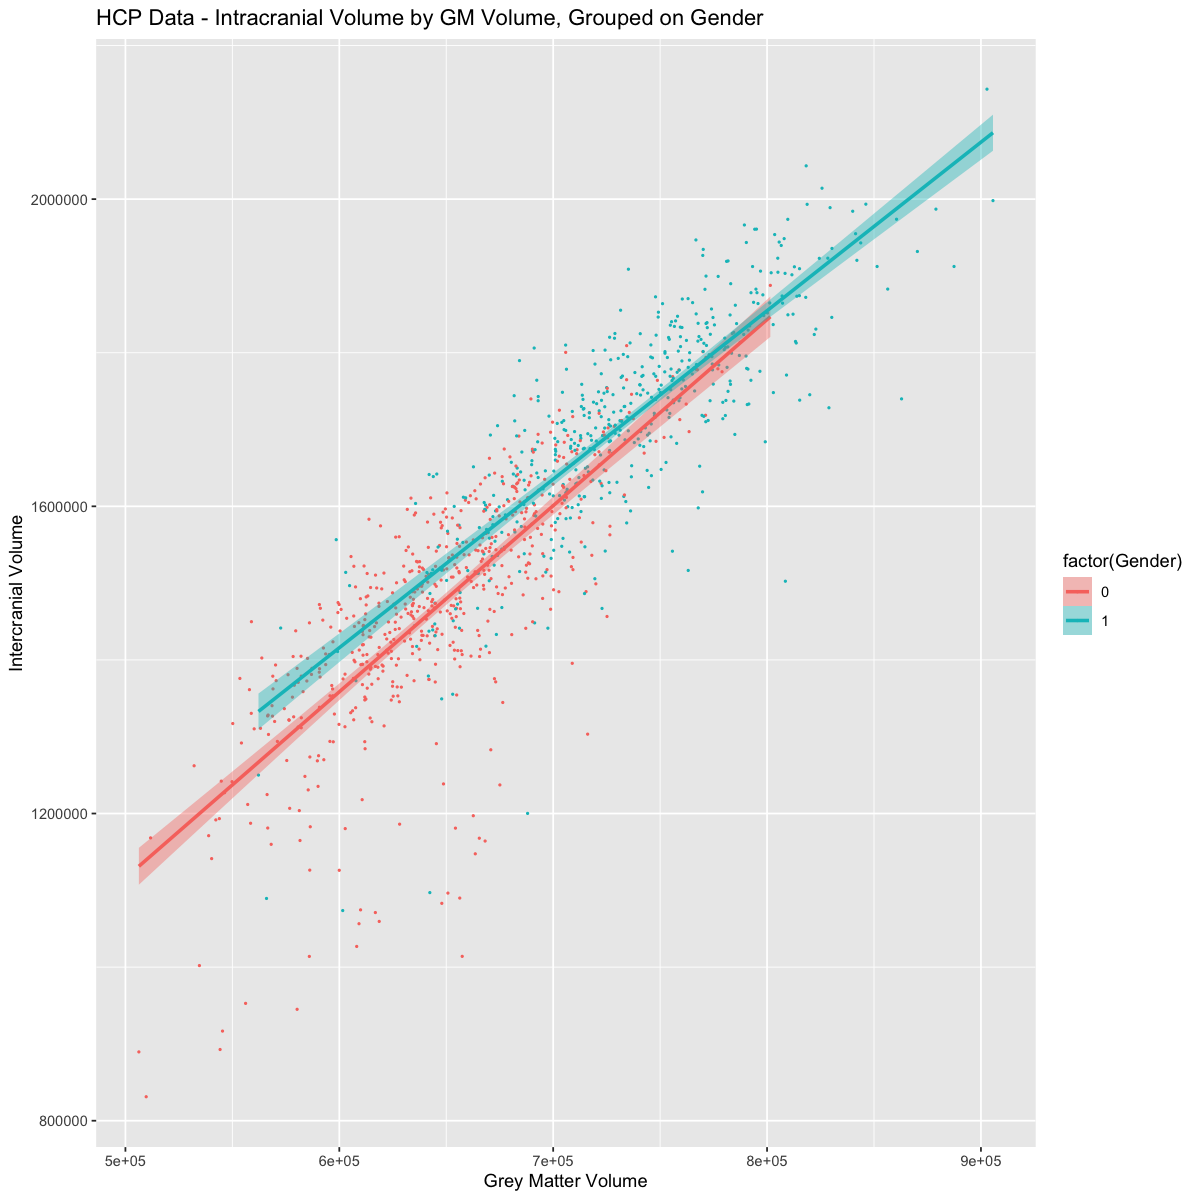

In [5]:
# WRITE YOUR CODE HERE


#plot
library("ggplot2")
options(repr.plot.width = 10, repr.plot.height = 10)
p <- ggplot(data = d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, fill=factor(Gender), group = factor(Gender), color = factor(Gender))) +
    geom_point(size=0.25) +
    xlab("Grey Matter Volume") +
    ylab("Intercranial Volume") +
    ggtitle("HCP Data - Intracranial Volume by GM Volume, Grouped on Gender") +
    geom_smooth(method='lm')
p

What patterns do you observe in the scatter plot?

Group 0, female, shows a wider variance in intracranial volume, particularly at lower levels of total grey matter volume. Both groups show a positive trend (which makes sense), with the female line slightly more positive. If I had to guess, r^2 for males would be slightly higher.

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [8]:
logit_model <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = binomial)
summary(logit_model)


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

Grey matter volume (p=4.7E-10) and Intracranial volume (p=2.01E-5).

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [9]:
prob <- predict(logit_model,d1)
pred <- rep(1, nrow(d1))
pred[prob < .5] = 0

confusion_df = data.frame(pred, d1$Gender) #create confusion df
colnames(confusion_df) = c('F = 0', 'M = 1')

# Show the confusion matrix
my_table <- table(confusion_df)

my_table

prop.table(my_table,margin = 2)

     M = 1
F = 0   0   1
    0 547 152
    1  59 355

     M = 1
F = 0          0          1
    0 0.90264026 0.29980276
    1 0.09735974 0.70019724

What is the prediction accuracy for gender from the full model?

902/1113 = 81%acc

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.


In [40]:
library(boot)

boot.fn <- function(data, index){  
    # return: throw this as output
    # coef: extract coefficients from model object 
    return(coef(glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = binomial,subset=index)))}
           
print(boot.fn(d1, 1:1113))

        (Intercept)       FS_Tot_WM_Vol     FS_Total_GM_Vol FS_IntraCranial_Vol 
      -2.261599e+01        2.139610e-06        1.959056e-05        5.019787e-06 


In [41]:
boot_obj = boot(d1 ,boot.fn ,R=1000) #R=repetitions 
print(boot_obj)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -2.261599e+01 -1.152434e-01 1.433458e+00
t2*  2.139610e-06  2.985531e-08 3.135715e-06
t3*  1.959056e-05  6.797499e-09 3.184265e-06
t4*  5.019787e-06  5.951207e-08 1.377912e-06


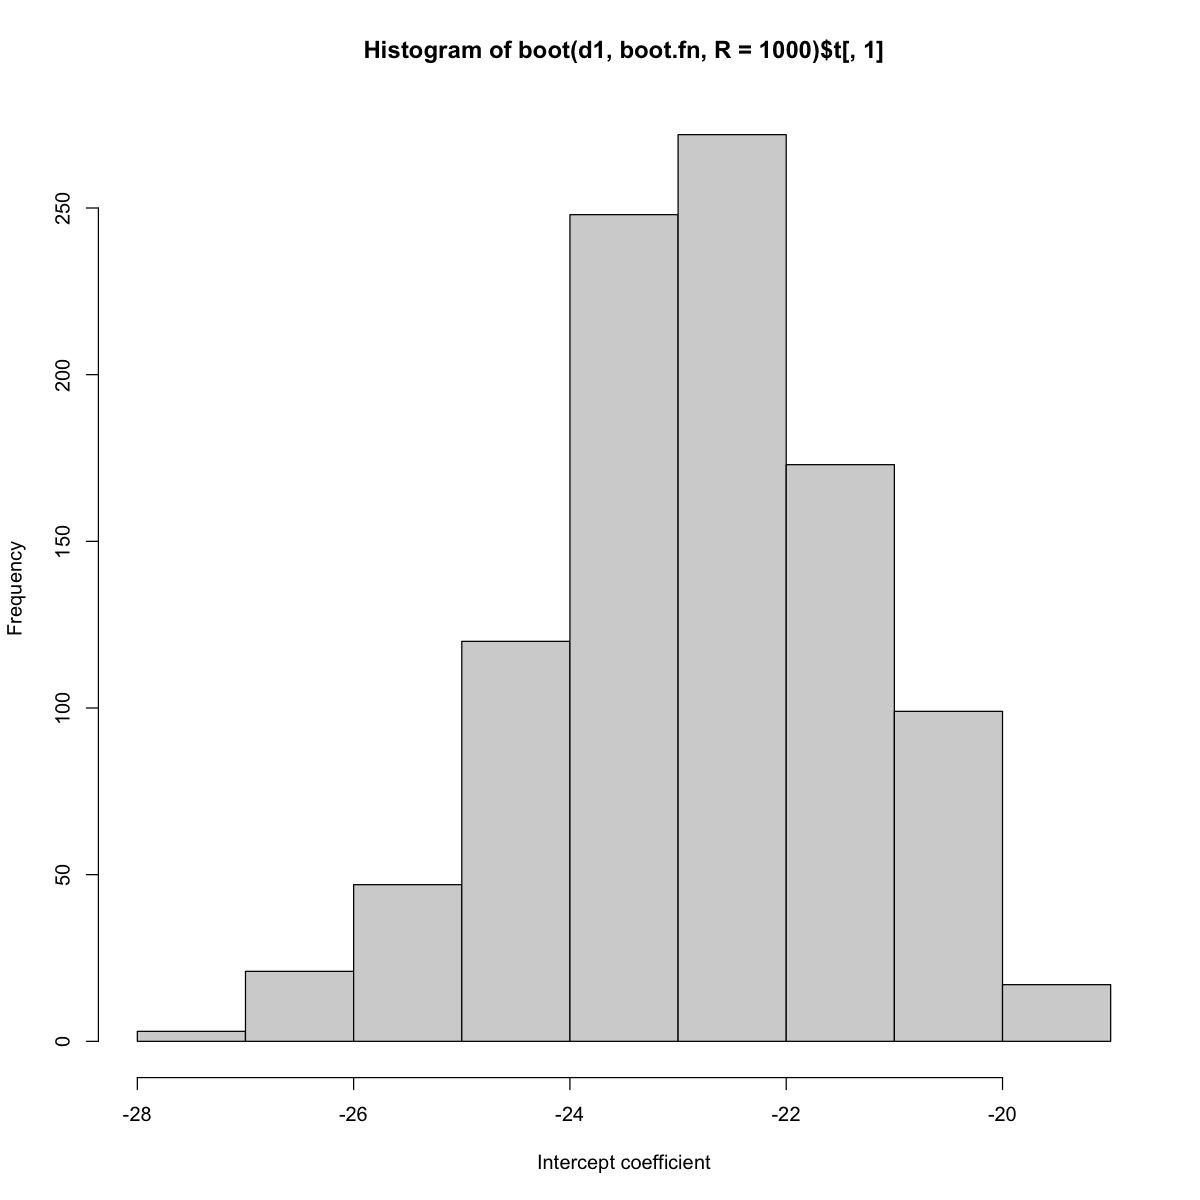

In [45]:
hist(boot(d1 ,boot.fn ,R=1000)$t[,1], xlab="Intercept coefficient")

In [82]:
sd=2*sd(boot_obj$t[,1])

cat("95% CI from ", boot_obj$t0[1] - sd, " - ", boot_obj$t0[1] + sd, "\n")

95% CI from  -25.48291  -  -19.74908 


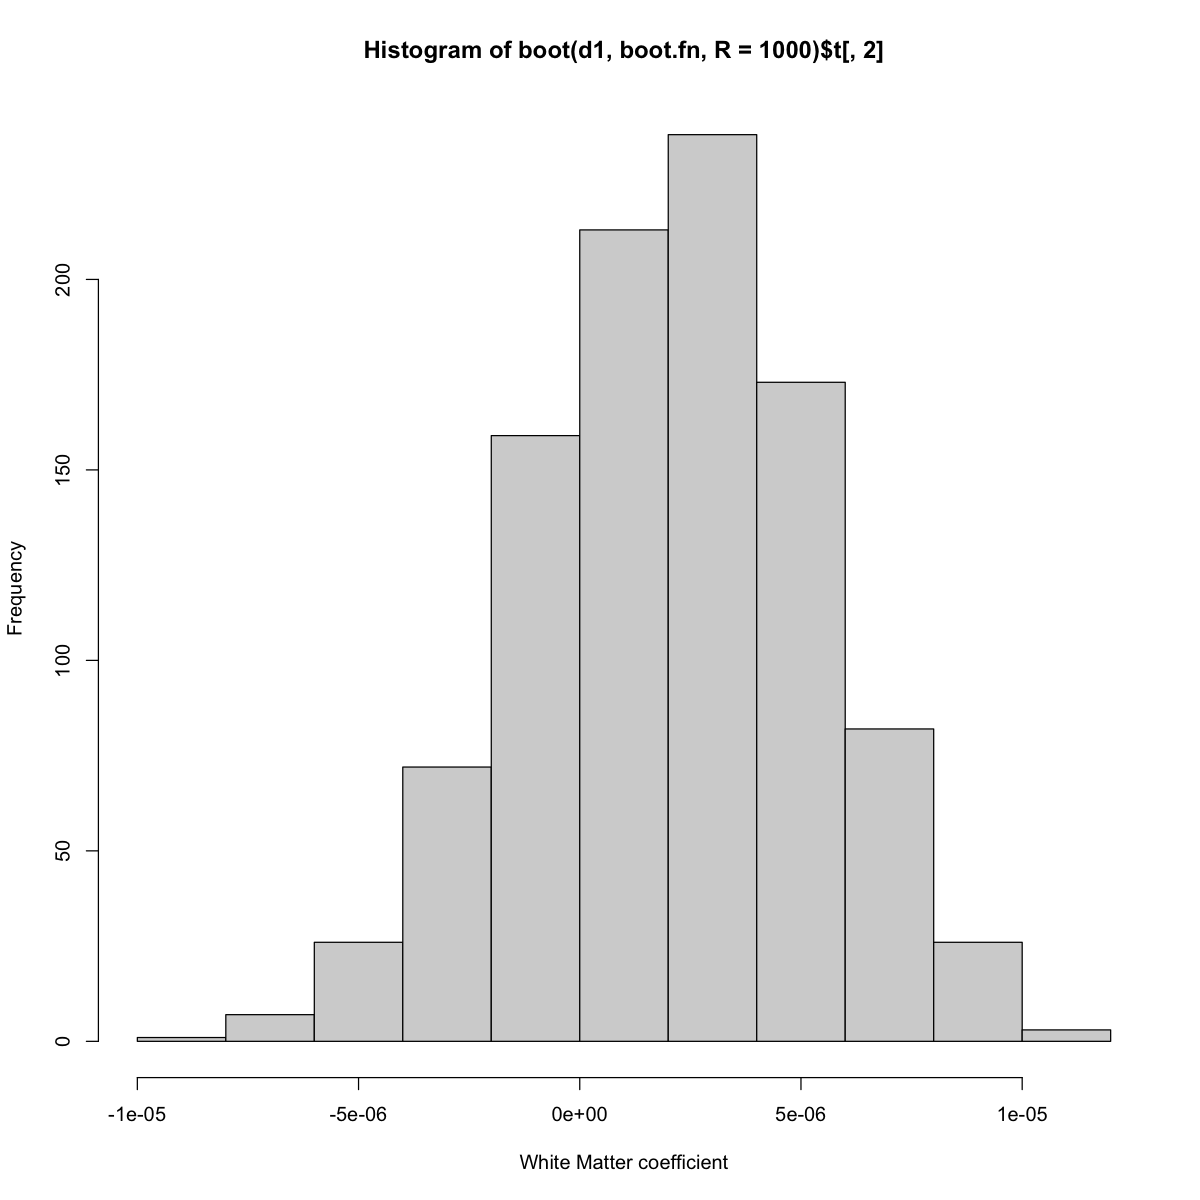

In [46]:
hist(boot(d1 ,boot.fn ,R=1000)$t[,2], xlab="White Matter coefficient")

In [83]:
sd=2*sd(boot_obj$t[,2])

cat("95% CI from ", boot_obj$t0[2] - sd, " - ", boot_obj$t0[2] + sd, "\n")

95% CI from  -4.131821e-06  -  8.41104e-06 


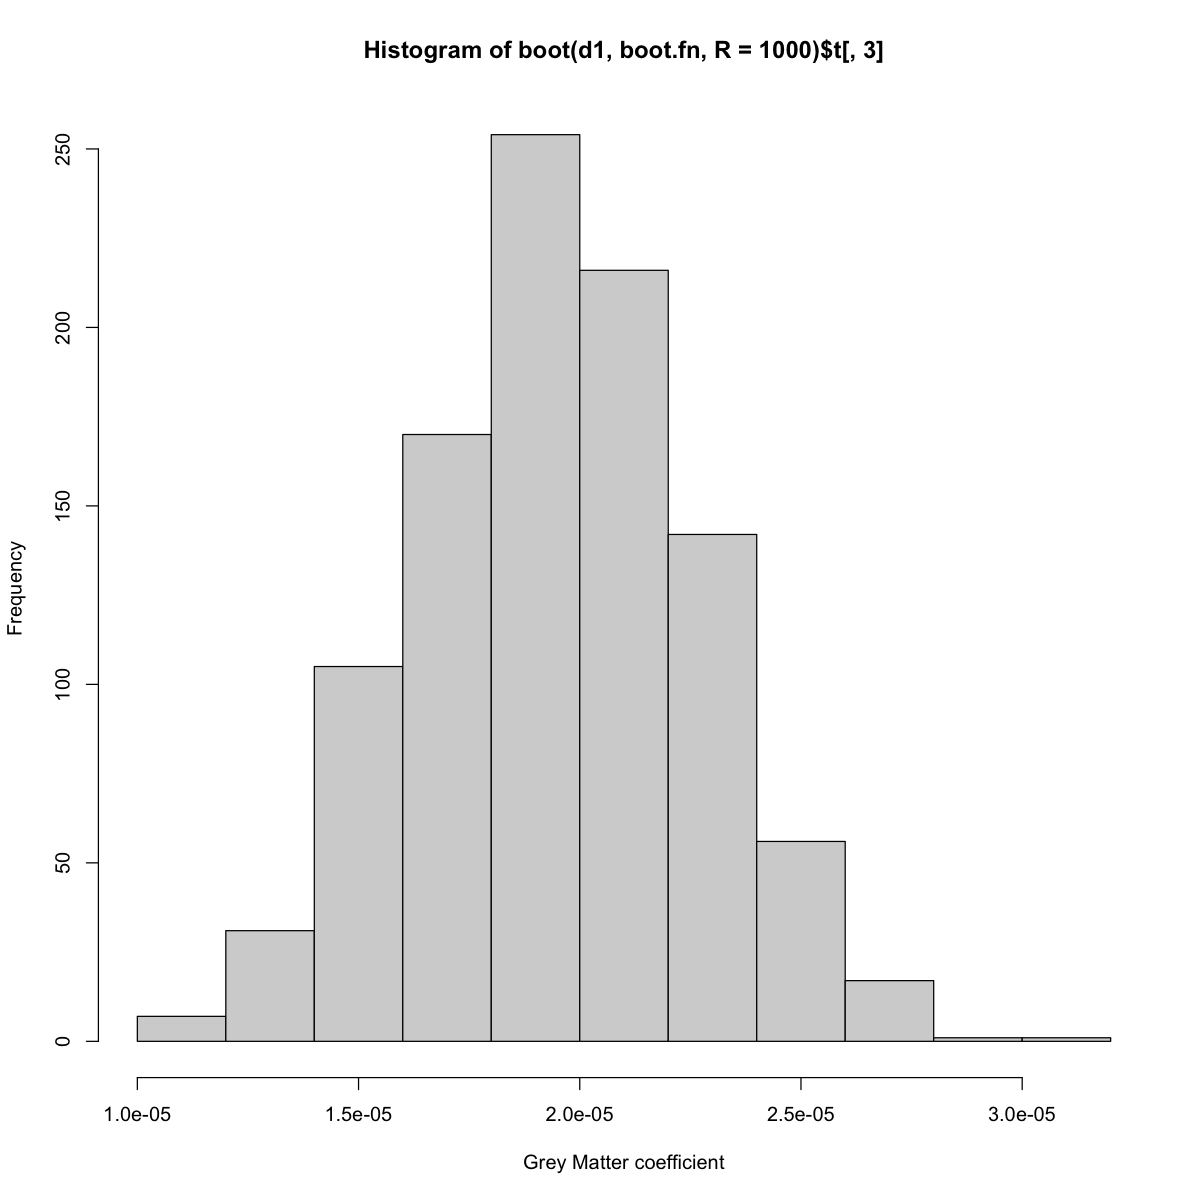

In [47]:
hist(boot(d1 ,boot.fn ,R=1000)$t[,3], xlab="Grey Matter coefficient")

In [85]:
sd=2*sd(boot_obj$t[,3])

cat("95% CI from ", boot_obj$t0[3] - sd, " - ", boot_obj$t0[3] + sd, "\n")

95% CI from  1.322203e-05  -  2.595909e-05 


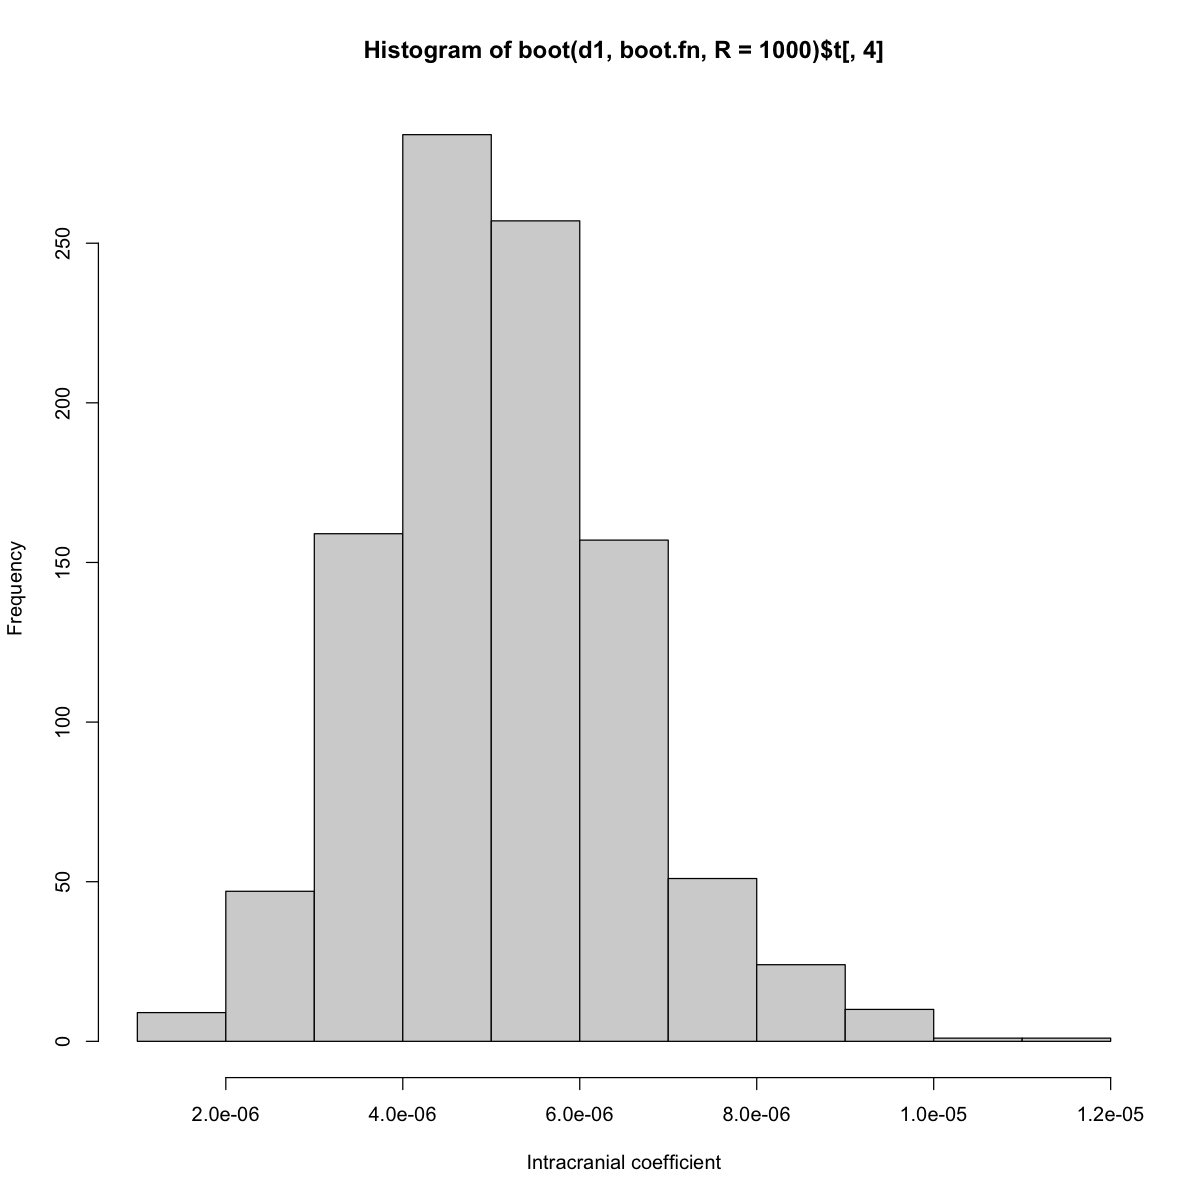

In [48]:
hist(boot(d1 ,boot.fn ,R=1000)$t[,4], xlab="Intracranial coefficient")

In [84]:
sd=2*sd(boot_obj$t[,4])

cat("95% CI from ", boot_obj$t0[4] - sd, " - ", boot_obj$t0[4] + sd, "\n")

95% CI from  2.263963e-06  -  7.77561e-06 


How robust is the prediction accuracy of the full model?

Quite robust! The bootstraps are more or less normally distributed, with tight bounds. 

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

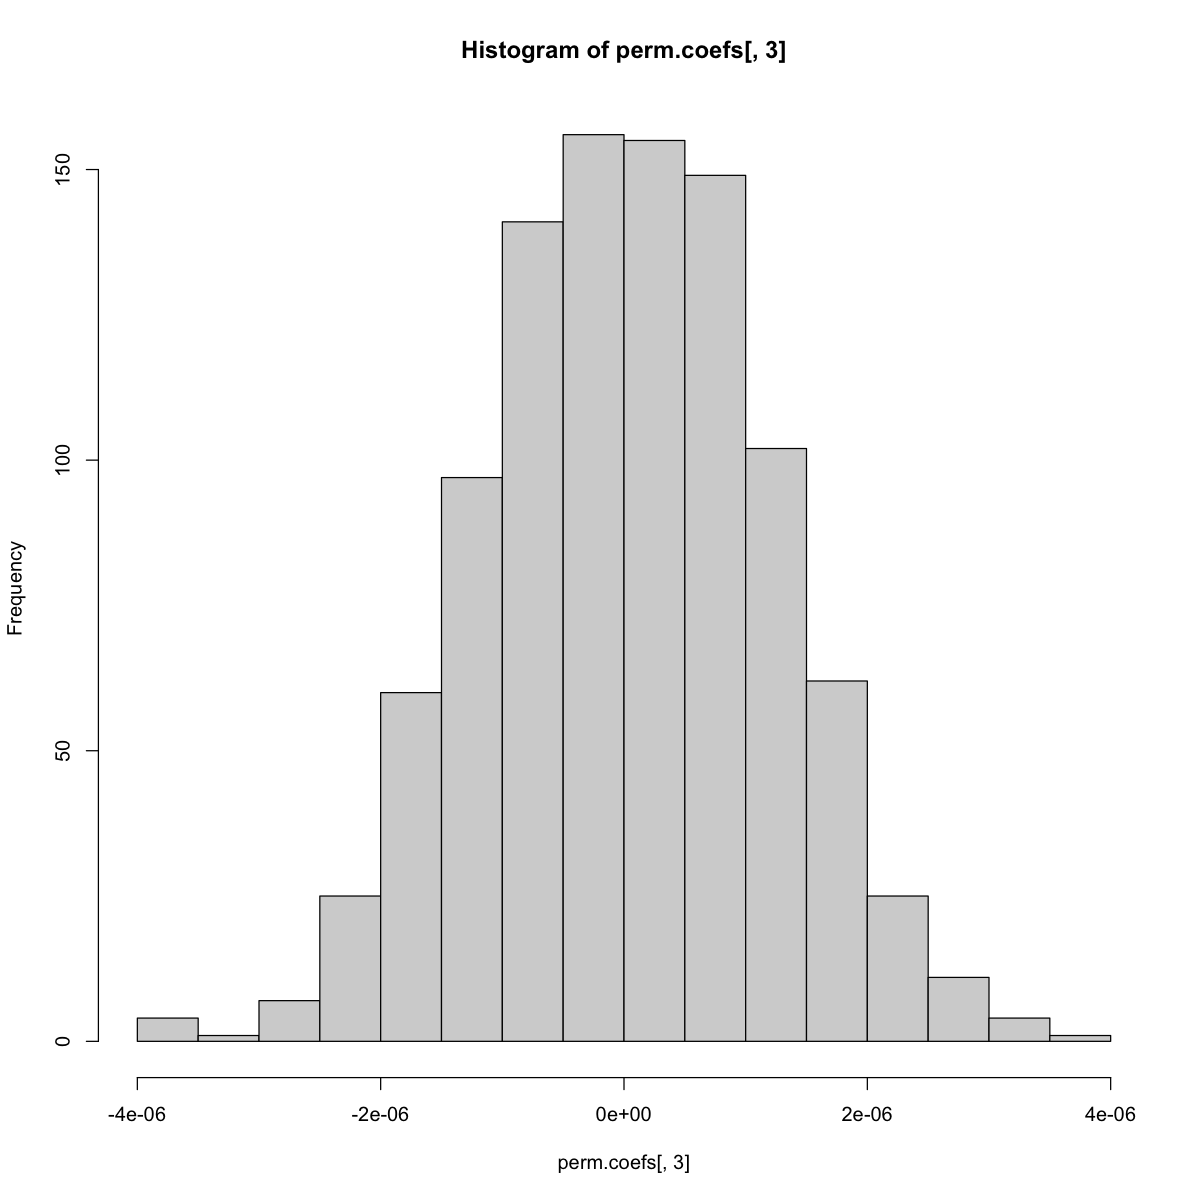

In [115]:
permdata = d1 #want to preserve the non-permuted, true form of data!

R=1000

perm.coefs=matrix(NA,nrow=R, ncol=4) #filling with nas at first

# Now just write a for loop where we scramble the observations
# in X using the sample() function. We'll scramble the observations in R different ways
for (i in 1:R){
  permdata$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(1113)] # This is a shuffled version of the Auto$horsepower vector
  perm.coefs[i,]=coef(glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = permdata, family = binomial))
    # then we get coefficients for linear model of shuffled horsepower to auto
}

# Take a look at the null distributions
hist(perm.coefs[,3])
abline(v=mean(boot_obj$t[,3]))

How much does the grey matter volume influence the prediction accuracy of the model?

In [123]:
permdata$FS_Total_GM_Vol <- d1$FS_Total_GM_Vol[sample(1113)]

logit_model2 <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = permdata, family = binomial)
summary(logit_model2)

prob <- predict(logit_model2,d1)
pred <- rep(1, nrow(d1))
pred[prob < .5] = 0

confusion_df2 = data.frame(pred, d1$Gender) #create confusion df
colnames(confusion_df2) = c('F = 0', 'M = 1')

# Show the confusion matrix
my_table2 <- table(confusion_df2)

my_table2

prop.table(my_table2,margin = 2)


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = permdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7465  -0.6770  -0.1853   0.6422   3.4647  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.929e+01  1.428e+00 -13.511  < 2e-16 ***
FS_Tot_WM_Vol        7.916e-06  2.942e-06   2.690  0.00714 ** 
FS_Total_GM_Vol      4.036e-07  1.221e-06   0.331  0.74094    
FS_IntraCranial_Vol  9.602e-06  1.016e-06   9.452  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  961.38  on 1109  degrees of freedom
AIC: 969.38

Number of Fisher Scoring iterations: 5


     M = 1
F = 0   0   1
    0 548 161
    1  58 346

     M = 1
F = 0          0          1
    0 0.90429043 0.31755424
    1 0.09570957 0.68244576

As implied by its p value, the grey matter holda a large influence over the predection. The abline doesn't appear over the histogram at all, since the t-val is roughly an order of magnitude larger than the response computed by the permutation test. Accuracy decreases by a small percent, particularly in Gender=1 group

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

The goal of the bootstrap is to compute your test statistic of choice via repeated testing of subpopulations (with replacement). This gives you a good idea about how consistent across the data your model is, and its robustness to outliers. Use it perhaps when you get an effect you are unsure about, was it merely by chance or does the bootstrap show many results within your confidence interval of choice?

Permutation tests examine the relationship between a particular X and Y by scrambling the mapping. Check the statistic found originally and compare it to the histogram of the permuted results. Use this when you want to quantify how one X influences a model with several Xs.

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*